# This project will consider the effects of GDP on the life expectancy of several countries



In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("all_data.csv") #importing the data and viewing the first 5 rows
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Project Outline

The Dataframe contains several columns:
- Country: The country the data is about
- Year: The year the data is collected from
- Life Expectancy at Birth: The life expectancy in that particular year at birth
- GDP: The GDP of the country in that year in standard form.

This project will look at each country in turn to ascertain the changes in life expectancy and GDP over time for each country.

In [15]:
print(df.Country.value_counts()) #looking at the different countries in the data and the number of years

print(df.info())

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


The data contains information on 6 countries:
- Chile
- China
- Germany
- Mexico
- USA
- Zimbabwe

The dataframe does not appear to be missing any data as all columns have 96 pieces of data.

# Life expectancy over time

The first to consider is how the life expectancy of each country has changed over time.

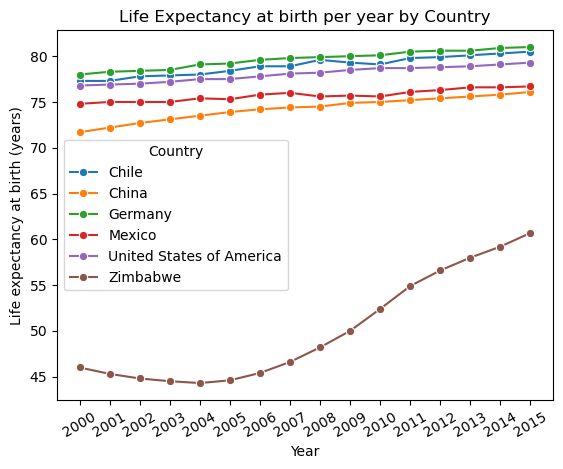

<Figure size 640x480 with 0 Axes>

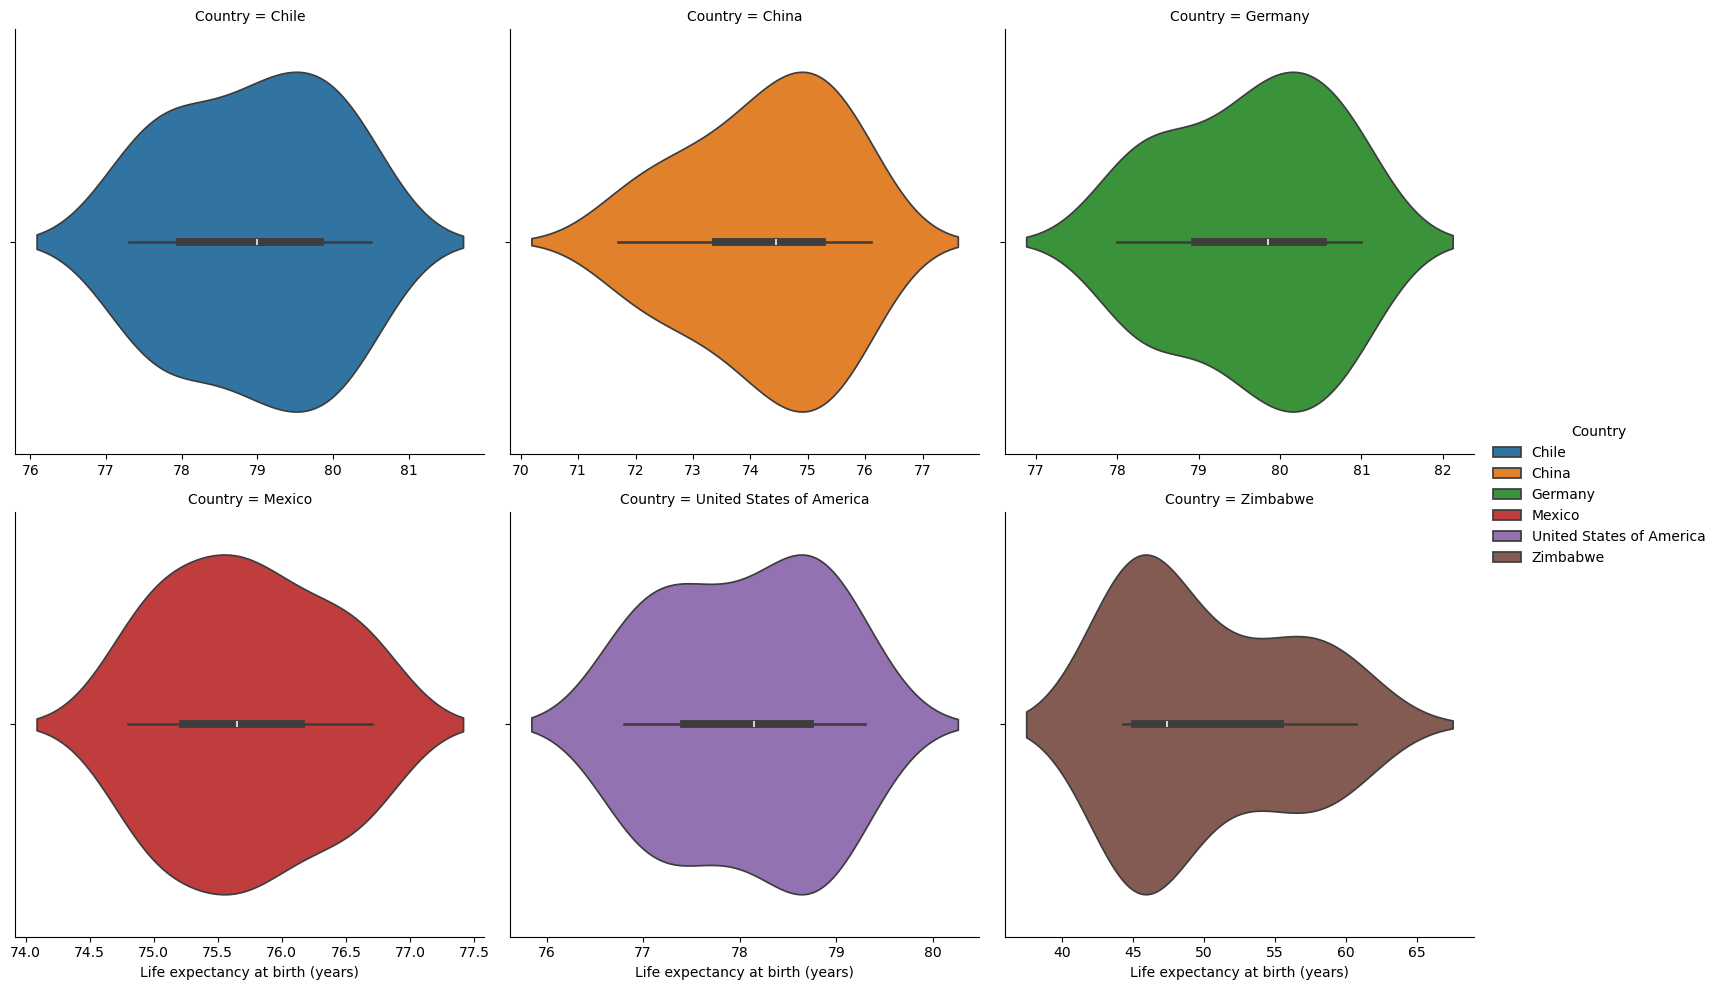

<Figure size 640x480 with 0 Axes>

In [139]:
ax = plt.subplot()
sns.lineplot(x = "Year", y = "Life expectancy at birth (years)", hue = "Country", data = df, marker = "o")
x_ticks = [i for i in range(2000, 2016)]
#life expectancy of each country by year.
plt.title("Life Expectancy at birth per year by Country")
ax.set_xticks(x_ticks)
plt.xticks(rotation = 30)
plt.show()
plt.clf()

facet3 = sns.catplot(data = df, kind = "violin", x = "Life expectancy at birth (years)", hue = "Country", col = "Country", col_wrap = 3, sharex = False, sharey = False)
plt.show()
plt.clf()

# Life expectancy by Country

Considering the plot above, between 2000 and 2015 the life expectancy of all countries have increased overall, however there are several interest things to consider.

- Zimbabwe life expectancy was decreasing year on year until 2004 when it started increasing rapidly, why is this?
- Mexico's life expectancy has overall increased, but went through a period of decline and stagnation between 2007 and 2010
- Chile had a similar decline during the period of 2008 and 2010

The violin plot shows the distribution of the Life expectancy values. We can see that Zimbabwe is very right skewed, with many of the values being towards the lower end of the violin. Chile, China, Germany and the USA are all left skewed, with China being the most prominent of the 3. Mexico is only slightly right skewed and could be considered almost symmetrical.

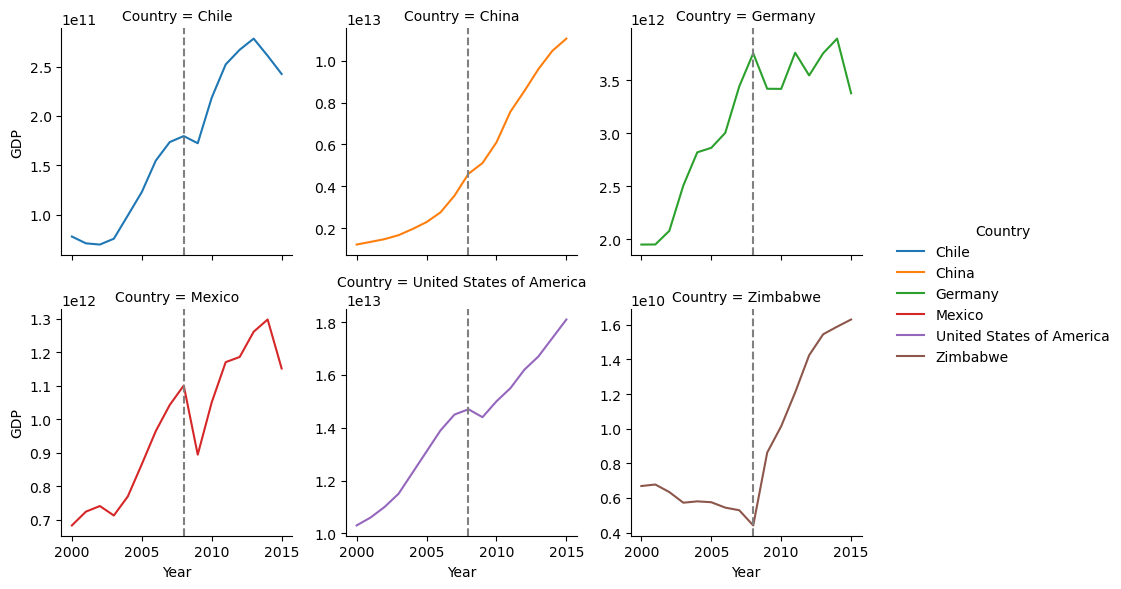

<Figure size 640x480 with 0 Axes>

In [57]:
facet2 = sns.FacetGrid(df, col = "Country", height = 3, col_wrap = 3, sharey = False, palette = "tab10", hue = "Country", legend_out = True)
facet2.map_dataframe(sns.lineplot, x = "Year", y = "GDP")
facet2.add_legend()
facet2.refline(x=2008) #showing the year of the financial crisis.
plt.show()
plt.clf()

# GDP of each Country between 2000 and 2015

Looking at the line plots above, we can see that in general between 2000 and 2015 all countries GDP has increased. However there are some interesting things to consider from the graphs.

- Most countries have a dip, some sharper than others (Mexico for example) around 2008. This aligns with the financial crisis that impacted the majority of countries. The USA and Chile seemed the least affected by this with them both experiencing smaller dips by comparison of others.
- China was the only country unaffected by this and has continued to grow unlike all other countries.
- Germany's GDP peaked in 2008 but since then has struggled to have a strong recovery like other countries and in 2015 it's economy is the only one who lagged its 2008 peak.

Country
Chile                       79.00
China                       74.45
Germany                     79.85
Mexico                      75.65
United States of America    78.15
Zimbabwe                    47.40
Name: Life expectancy at birth (years), dtype: float64
[79.0, 74.45, 79.85, 75.65, 78.15, 47.400000000000006]


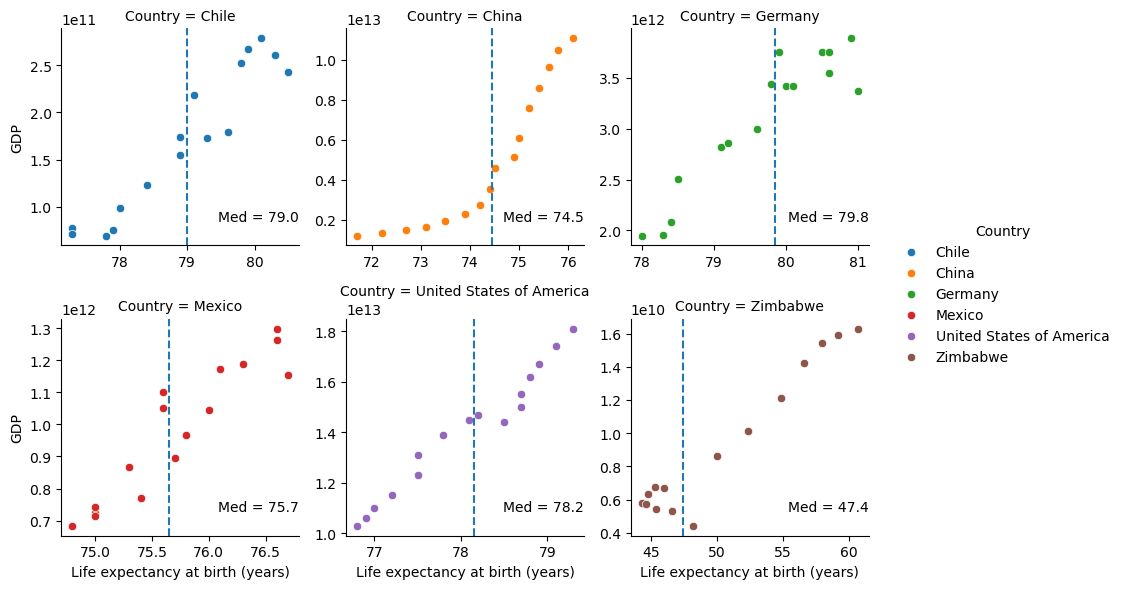

<Figure size 640x480 with 0 Axes>

In [133]:
facet1 = sns.FacetGrid(df, col = "Country", height = 3, col_wrap = 3, sharey= False, sharex = False, palette = "tab10", hue = "Country", legend_out = True)
facet1.map_dataframe(sns.scatterplot, x = "Life expectancy at birth (years)", y = "GDP")
facet1.add_legend()
# median = df.groupby("Country")["Life expectancy at birth (years)"].median()
# print(median)
medians = df.groupby("Country")["Life expectancy at birth (years)"].median().to_list()
print(medians) 
n = 0
for ax in facet1.axes.flat:
    ax.axvline(x = medians[n], linestyle = "--")
    n += 1

def annotate(data, **kws):
    median = round(data["Life expectancy at birth (years)"].median(), 1)
    ax = plt.gca()
    ax.text(1, 0.1, f"Med = {median}", transform=ax.transAxes, ha = "right", va = "bottom")
    
facet1.map_dataframe(annotate)
plt.show()
plt.clf()

#using a facet grid instead of a subplot to plot the scattergraphs of life expectancy at birth vs GDP.

# fig, ax = plt.subplots(2, 3, figsize = (12, 10))
# plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
# plt.subplot(2, 3, 1)
# sns.scatterplot(x = "Life expectancy at birth (years)", y = "GDP", data = df[df.Country == "Chile"], marker = "o", color = "red")
# plt.subplot(2, 3, 2)
# sns.scatterplot(x = "Life expectancy at birth (years)", y = "GDP", data = df[df.Country == "China"], marker = "o", color = "blue")
# plt.subplot(2, 3, 3)
# sns.scatterplot(x = "Life expectancy at birth (years)", y = "GDP", data = df[df.Country == "Germany"], marker = "o", color = "green")
# plt.subplot(2, 3, 4)
# sns.scatterplot(x = "Life expectancy at birth (years)", y = "GDP", data = df[df.Country == "Mexico"], marker = "o", color = "orange")
# plt.subplot(2, 3, 5)
# sns.scatterplot(x = "Life expectancy at birth (years)", y = "GDP", data = df[df.Country == "United States of America"], marker = "o", color = "purple")
# plt.subplot(2, 3, 6)
# sns.scatterplot(x = "Life expectancy at birth (years)", y = "GDP", data = df[df.Country == "Zimbabwe"], marker = "o", color = "brown")
# fig.legend(["Chile", "China", "Germany", "Mexico", "USA", "Zimbabwe"], loc = "center right")
# plt.show()
# plt.clf()

# Life Expectancy vs GDP

From the scattergraphs above it can be shown that typically higher life expectancy is experienced at higher levels of a countries GDP. There are some interesting patterns to note though.

- Chile, Mexico, Germany and the USA experience a general positive correlation between their Life expectancy and their GDP, however there were years were the GDP dipped but life expectancy was higher.
- China is the only country which has experienced a higher GDP and higher life expectancy year on year in comparison to other countries. America is close but has a small dip in the graph showing some years had a lower GDP than others. This dip aligns with the 2008 financial crisis.

A vertical line has been plotted at the median life expectancy of each country. We can see that the country with the highest life expectancy on average is Germany, followed closely by Chile and the USA with Zimbabwe being the lowest at 47.4 years. China's rapid growth in it's life expectancy due to a surge in it's economy may see it outpace the two highest countries. 

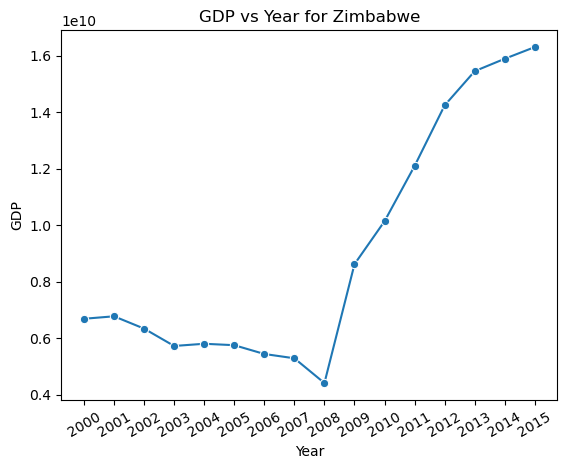

<Figure size 640x480 with 0 Axes>

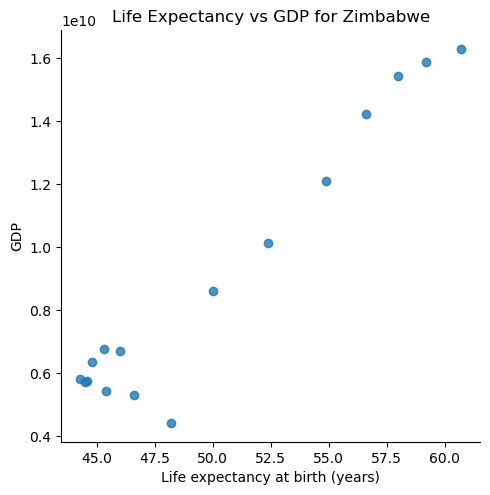

<Figure size 640x480 with 0 Axes>

In [91]:
df_zim = df[df.Country == "Zimbabwe"]
ax1 = plt.subplot()
sns.lineplot(x = "Year", y = "GDP", data = df_zim, marker = "o")
ax1.set_xticks(x_ticks)
plt.xticks(rotation = 30)
plt.title("GDP vs Year for Zimbabwe")
plt.show()
plt.clf()
sns.lmplot(x = "Life expectancy at birth (years)", y = "GDP", data = df_zim, fit_reg = False)
plt.title("Life Expectancy vs GDP for Zimbabwe")
plt.show()
plt.clf()

# Zimbabwe

Looking more closely at Zimbabwe as a country since it is a clear outlier when it comes to life expectancy. The plots have been enlarged to allow for a closer comparison.

Looking at the first line plot above, we can see that between 2000 and 2008, Zimbabwe's GDP was in decline. This aligns with news articles at the time where the country's economy was ailing caused by an economic crisis. This reduced many workers to beggars which would have affected life expectancy with many not being able to afford health care. In 2008 following elections was a time of turmoil for the economy, from the graph we can see that the GDP of the country rapidly increased.

The second graph is a scatter plot of the life expectancy vs the GDP of the country. We can see that typically higher life expectancy is correlated with a higher GDP. This is something looked at on e a per country basis before. With Zimbabwe being the only African country on this list, with all other countries being from Europe, Asia and the America's, we can see that life expectancy in the African countries still lags massively behind the rest of the world.

# Conclusion

We can see that overall all countries have seen their life expectancy grow between the years of 2000 and 2015, and this has typically correlated with higher levels of GDP. However, the data only covers these two variables and doesn't factor in other reasons as to why life expectancy has grown.

For example, Germany's GDP has varied wildly between 2008 and 2015, yet it's life expectancy has continued to grow. China's GDP has seen explosive growth in its GDP, but has life expectancy exploded in a similar way? The strength of the economy may not be wholly linked to the health of the population.

In order to fully explore this more data would be required. This could include;
- Physicians per populace for each country
- Education levels
- Access rates for healthcare
- Whether or not the country uses a private or a public healthcare system
- Obesity levels in a country

These are but a small number of variables which could affect the life expectancy of a country. For now, we can see that a more wealthy country typically has a longer living population.